In [19]:
import pandas as pd
import sqlite3
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import ranksums
!pip install statsmodels
!pip install dash==2.6.0
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline



con = sqlite3.connect('Downloads/2022Cosmos13TestData (2).db')
cur = con.cursor()

Crating one table that includes all of the different values which are initially stored in separate tables

In [20]:
# joined_table
sql = '''
SELECT ph.level, lt.timestamp, lt.lat, lt.lon, lt.boat_id, temperature.degree, dissolved_solids.ppm
FROM location_time AS lt 
INNER JOIN ph
ON ph.locationtime_id = lt.id
INNER JOIN temperature
ON temperature.locationtime_id = lt.id
INNER JOIN dissolved_solids
ON dissolved_solids.locationtime_id = lt.id
'''
df_wtr = pd.read_sql(sql, con)
df_wtr.head()

level            timestamp     lat     lon  boat_id  degree    ppm
0  405.81  2016-01-11 06:43:58 -58.680 -65.522        1    2.82  33.84
1  405.08  2016-01-11 06:47:40 -58.690 -65.517        1    2.78  33.83
2  404.47  2016-01-11 06:50:23 -58.698 -65.512        1    2.75  33.83
3  404.02  2016-01-11 06:53:07 -58.706 -65.508        1    2.72  33.82
4  403.64  2016-01-11 06:55:51 -58.711 -65.504        1    2.70  33.82

Exploratory Data Analysis(EDA)
Charts, graphs, relationships between features

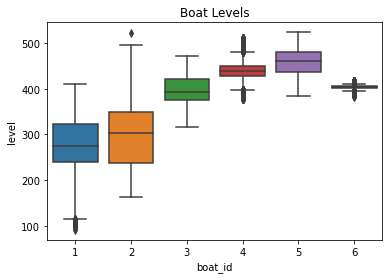

In [21]:
# Create a box and whisker plot
g = sns.boxplot(
    data=df_wtr,
    x = 'boat_id',
    y = 'level'
).set(title="Boat Levels")

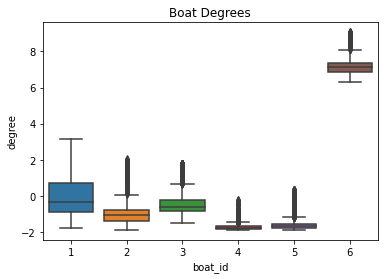

In [22]:
# Create a box and whisker plot
g = sns.boxplot(
    data=df_wtr,
    x = 'boat_id',
    y = 'degree'
).set(title="Boat Degrees")

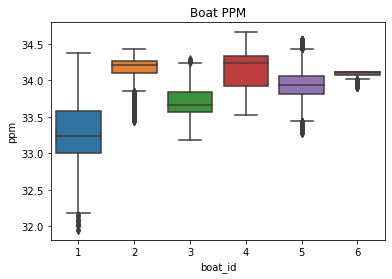

In [23]:
# Create a box and whisker plot
g = sns.boxplot(
    data=df_wtr,
    x = 'boat_id',
    y = 'ppm'
).set(title="Boat PPM")

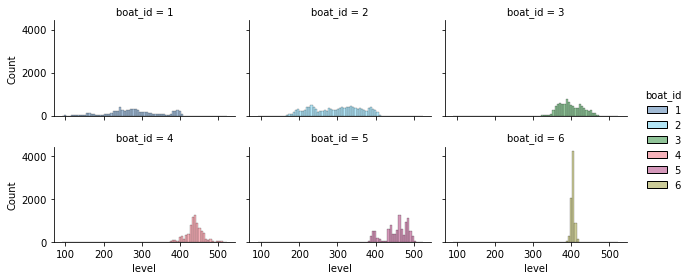

In [26]:
colors = ["#4477AA", "#66CCEE", "#228833", "#EE6677", "#AA3377", "#999933"]
colors
sns.color_palette(colors)

g = sns.displot(
    data=df_wtr,
    x='level',
    hue='boat_id',
    kind='hist',
    col='boat_id',
    col_wrap=3,
    palette=sns.color_palette(palette = colors, n_colors=6),
    height = 2, 
    aspect = 1.5
)

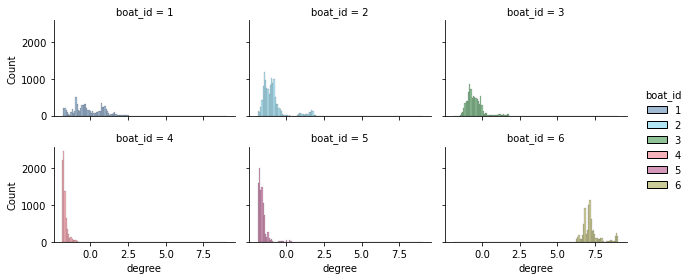

In [27]:
colors = ["#4477AA", "#66CCEE", "#228833", "#EE6677", "#AA3377", "#999933"]
colors
sns.color_palette(colors)

g = sns.displot(
    data=df_wtr,
    x='degree',
    hue='boat_id',
    kind='hist',
    col='boat_id',
    col_wrap=3,
    palette=sns.color_palette(palette = colors, n_colors=6),
    height = 2, 
    aspect = 1.5
)

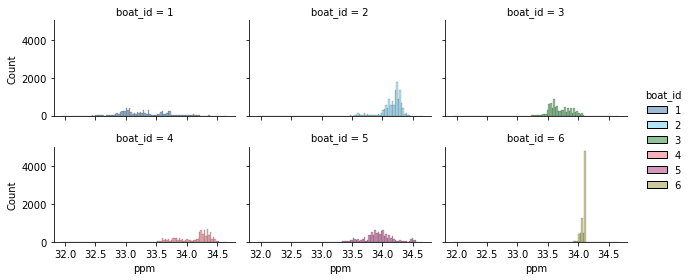

In [28]:
colors = ["#4477AA", "#66CCEE", "#228833", "#EE6677", "#AA3377", "#999933"]
colors
sns.color_palette(colors)

g = sns.displot(
    data=df_wtr,
    x='ppm',
    hue='boat_id',
    kind='hist',
    col='boat_id',
    col_wrap=3, 
    palette=sns.color_palette(palette = colors, n_colors=6),
    height = 2, 
    aspect = 1.5
)

Pairplot to see if one of the features seems to be able to predict another

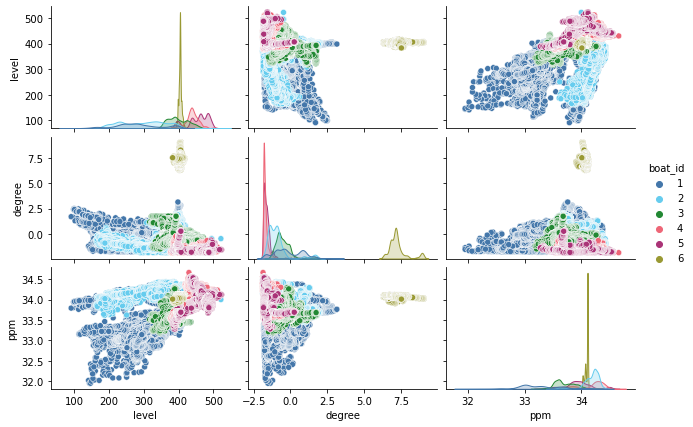

In [29]:
#df_wtr = df_wtr[['level', 'degree', 'ppm']
colors = ["#4477AA", "#66CCEE", "#228833", "#EE6677", "#AA3377", "#999933"]
colors
sns.color_palette(colors)

df_wtr_features = df_wtr[['level', 'degree', 'ppm', 'boat_id']]
sns.pairplot(
    data = df_wtr_features,
    palette=sns.color_palette(palette = colors, n_colors=6),
    height = 2, 
    aspect = 1.5,
    hue = "boat_id"
)

level vs ppm appears to have a positive linear correlation. No other relationships are clear at this point. 

numerical values of the correlations between the three features

In [30]:
corr = df_wtr[['level', 'degree', 'ppm']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\clair\AppData\Local\Temp\ipykernel_19240\3221601038.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


Density map to display severity of features at correct lon and lat on map

In [32]:
fig = go.Figure(go.Densitymapbox(lat=df_wtr["lat"], lon=df_wtr["lon"], z=df_wtr["level"],
                                 radius=5))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Heatmaps (but shouldnt it be the same shape as the path? It appears to maybe be filling in the middle unknown part?)

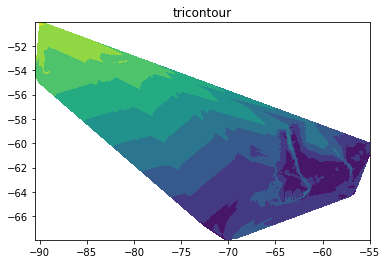

In [33]:
fig, (ax2)=plt.subplots(ncols=1)
# ax.set_title("tripcolor")
# ax.tripcolor(df_wtr["lon"], df_wtr["lat"], df_wtr["degree"])
ax2.set_title("tricontour")
ax2.tricontourf(df_wtr["lon"], df_wtr["lat"], df_wtr["degree"])

plt.show()

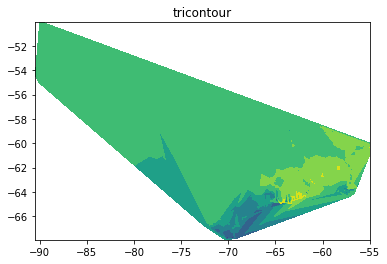

In [34]:
fig, (ax2)=plt.subplots(ncols=1)
# ax.set_title("tripcolor")
# ax.tripcolor(df_wtr["lon"], df_wtr["lat"], df_wtr["level"])
ax2.set_title("tricontour")
ax2.tricontourf(df_wtr["lon"], df_wtr["lat"], df_wtr["level"])

plt.show()

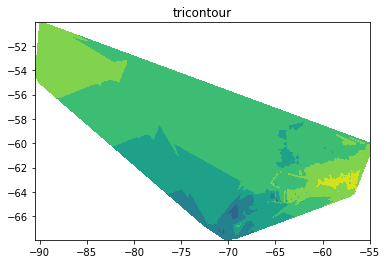

In [35]:
fig, (ax2)=plt.subplots(ncols=1)
# ax.set_title("tripcolor")
# ax.tripcolor(df_wtr["lon"], df_wtr["lat"], df_wtr["ppm"])
ax2.set_title("tricontour")
ax2.tricontourf(df_wtr["lon"], df_wtr["lat"], df_wtr["ppm"])

plt.show()

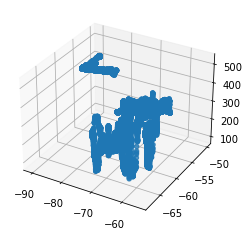

In [36]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_wtr.lon,df_wtr.lat,df_wtr.level) # plot the point (2,3,4) on the figure

plt.show()

Variations between the features

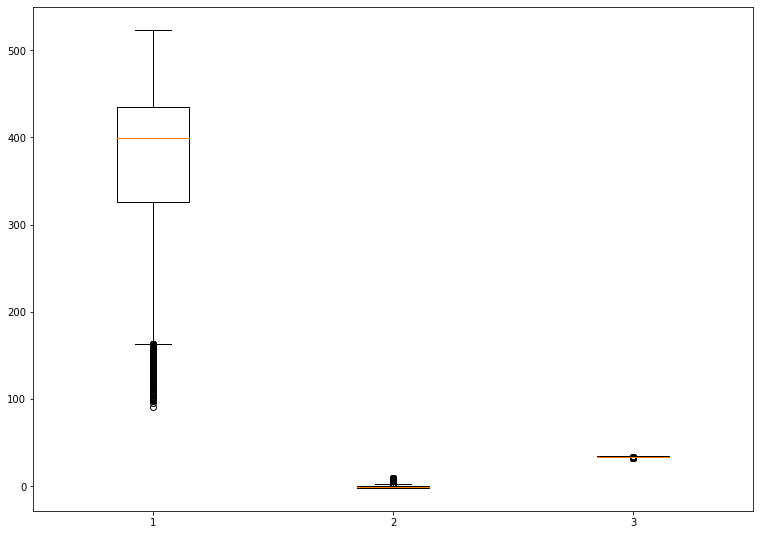

In [37]:
data = [df_wtr.level, df_wtr.degree, df_wtr.ppm]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

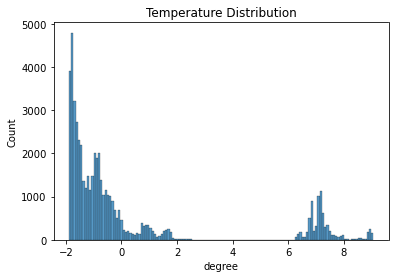

In [38]:
# Create a histogram of the heights
g = sns.histplot(
    data=df_wtr,
    x= "degree"
).set(title='Temperature Distribution')

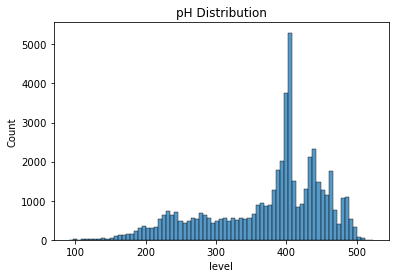

In [39]:
# Create a histogram of the heights
g = sns.histplot(
    data=df_wtr,
    x= "level"
).set(title='pH Distribution')

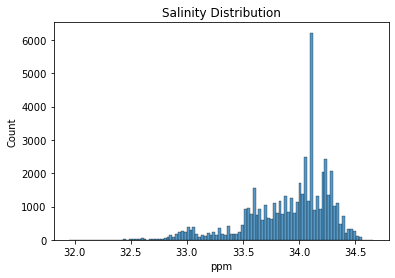

In [40]:
# Create a histogram of the heights
g = sns.histplot(
    data=df_wtr,
    x= "ppm"
).set(title='Salinity Distribution')

K Means Clustering

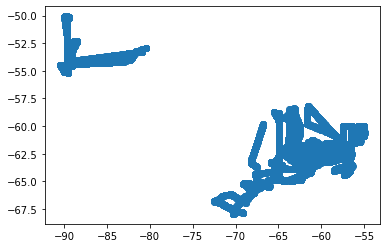

In [41]:
plt.scatter(df_wtr['lon'], df_wtr['lat'])

In [42]:
km = KMeans(n_clusters = 2)
km
y_predicted = km.fit_predict(df_wtr[['lon', 'lat']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [43]:
km.cluster_centers_

array([[-61.52699383, -63.64110392],
       [-88.59816476, -53.58487161]])

In [44]:
df_wtr['cluster'] = y_predicted
df_wtr.head()

level            timestamp     lat     lon  boat_id  degree    ppm  \
0  405.81  2016-01-11 06:43:58 -58.680 -65.522        1    2.82  33.84   
1  405.08  2016-01-11 06:47:40 -58.690 -65.517        1    2.78  33.83   
2  404.47  2016-01-11 06:50:23 -58.698 -65.512        1    2.75  33.83   
3  404.02  2016-01-11 06:53:07 -58.706 -65.508        1    2.72  33.82   
4  403.64  2016-01-11 06:55:51 -58.711 -65.504        1    2.70  33.82   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0

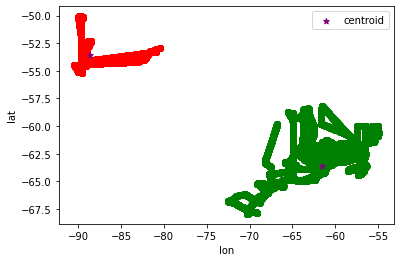

In [45]:
df1 = df_wtr[df_wtr.cluster==0]
df2 = df_wtr[df_wtr.cluster==1]

plt.scatter(df1.lon, df1['lat'], color = 'green')
plt.scatter(df2.lon, df2['lat'], color = 'red')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple',marker = '*', label = 'centroid')

plt.xlabel('lon')
plt.ylabel('lat')
plt.legend()

Analyzing differences between the clusters we just found

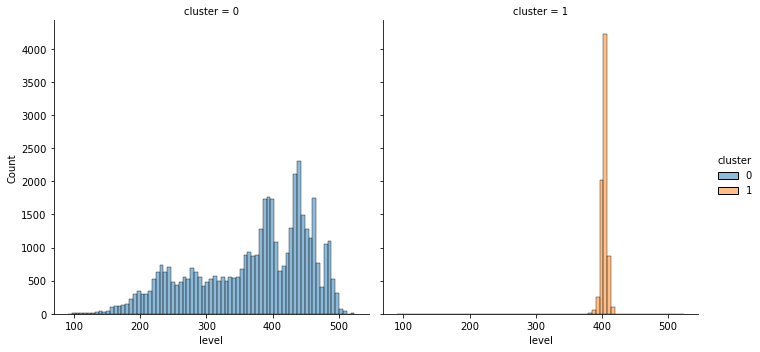

In [46]:
g = sns.displot(
    data=df_wtr,
    x='level',
    hue='cluster',
    kind='hist',
    col='cluster',
    col_wrap=2
)

In [47]:
df_cluster0 = df_wtr[df_wtr.cluster == 0]
stats.normaltest(df_cluster0.level)

NormaltestResult(statistic=4054.264441758057, pvalue=0.0)

pvalue is less than 0.05 so reject the null hypothesis (the features have a normal distribution)

In [48]:
df_cluster1 = df_wtr[df_wtr.cluster == 1] 
stats.normaltest(df_cluster1.level)

NormaltestResult(statistic=352.7421375730245, pvalue=2.5294031707706865e-77)

pvalue is less than 0.05 so reject the null hypothesis (the features have a normal distribution)

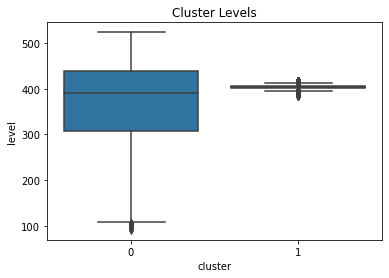

In [49]:
# Create a box and whisker plot
g = sns.boxplot(
    data=df_wtr,
    x = 'cluster',
    y = 'level'
).set(title="Cluster Levels")

ANOVA and Ordinary Least Squares

In [50]:
# Create the ANOVA model and show the results
model = ols('level ~ cluster', data=df_wtr).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq       df            F         PR(>F)
cluster   7.271345e+06      1.0  1140.011595  2.914240e-247
Residual  3.364430e+08  52748.0          NaN            NaN

PR is less than 0.05 so reject null hypothesis (don't have significant statistical differences)

ANOVA works best when the distribution is normal, and it is not

In [51]:
# Kruskal-Wallis Test
stats.kruskal(df_cluster0.level, df_cluster1.level)

KruskalResult(statistic=509.5267765469526, pvalue=8.038492868829137e-113)

p value is less than 0.05 so reject the null hypothesis (don't have significant statistical differences)

In [52]:
# Wilcoxon Rank-Sum Test
ranksums(df_cluster0.level, df_cluster1.level)

RanksumsResult(statistic=-22.572699671954236, pvalue=8.038517300136909e-113)

p value is less than 0.05 so reject the null hypothesis (don't have significant statistical differences)

Linear Regression

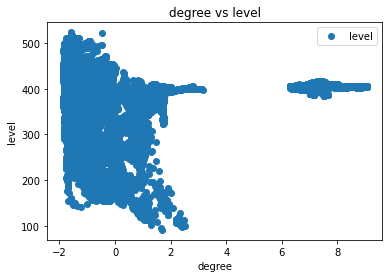

C:\Users\clair\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



[374.49066844]
[[1.11285295]]


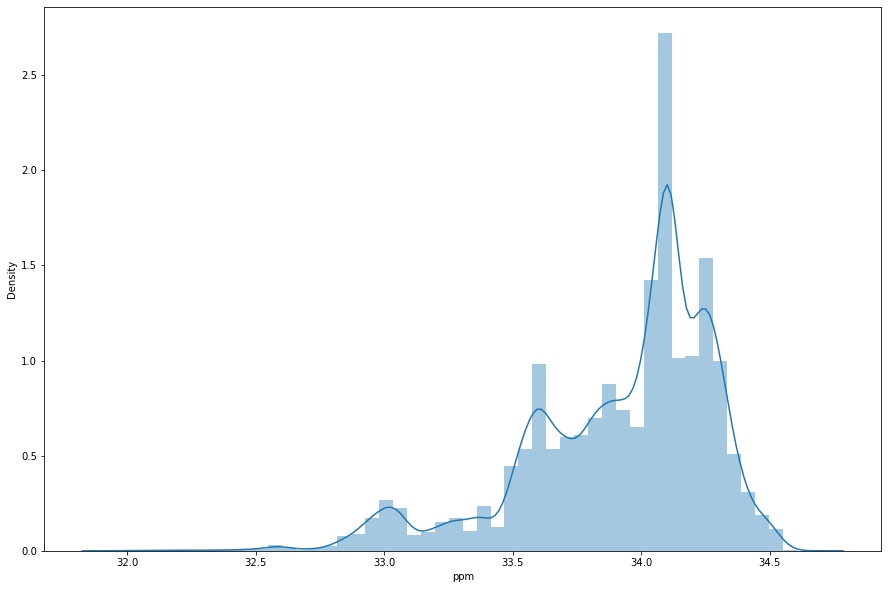

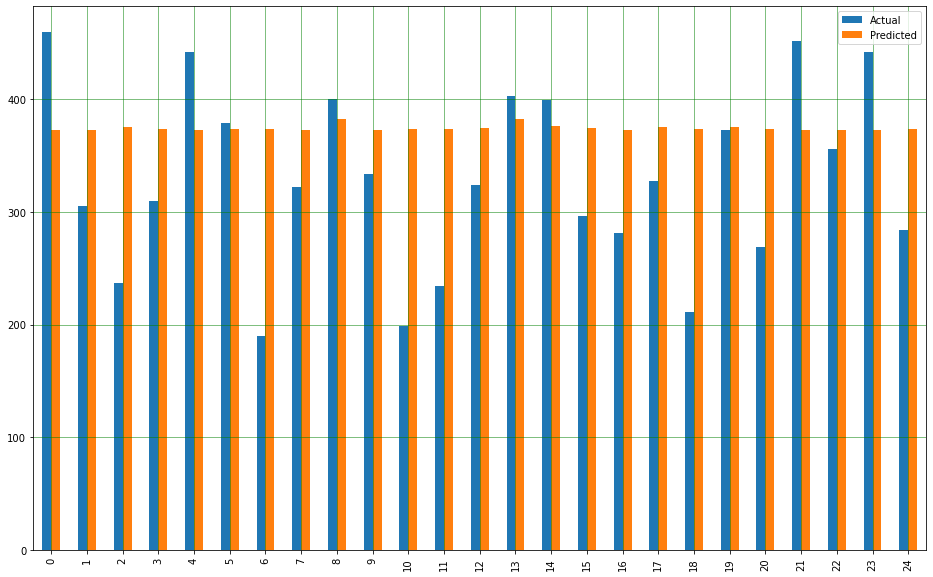

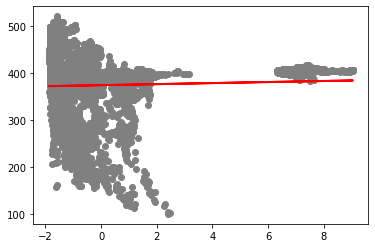

In [53]:
df_wtr.plot(x='degree', y='level', style='o')  
plt.title('degree vs level')  
plt.xlabel('degree')  
plt.ylabel('level')  
plt.show()

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_wtr['ppm'])

X = df_wtr['degree'].values.reshape(-1,1)
y = df_wtr['level'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


In [57]:
df_wtr2 = df_wtr[df_wtr.boat_id == 2] 

model2 = ols('level ~ ppm + degree', data=df_wtr2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  level   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     922.4
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:16:34   Log-Likelihood:                -68355.
No. Observations:               12415   AIC:                         1.367e+05
Df Residuals:                   12412   BIC:                         1.367e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8044.2765    194.714    -41.313      0.000   -8425.946   -7662.607
ppm          245.3452      5.726     42.847      0.000     234.121     256.569
degree        44.8678      1.224     36.662      0.000      42.469      47.267
==============================================================================
Omnibus:                      610.168   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              320.247
Skew:                           0.223   Prob(JB):                     2.88e-70
Kurtosis:                       2.352   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\clair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



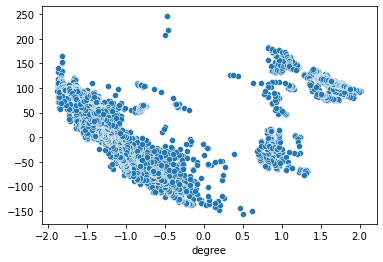

In [58]:
g = sns.scatterplot(df_wtr.degree, model2.resid)

In [59]:
X = np.array(df_wtr[['ppm', 'degree']])
y = np.array(df_wtr[['level']])

regr = LinearRegression()
regr.fit(X, y)

regr.coef_

array([[66.92407197,  0.39543846]])